# Exploratory Data Analysis and Visualization
******

### We have a dataset with processed text data and several important text-related features that we extracted from the original dataset. We can now visualize the distribution of different features and correlations. Since we are working on classification problem for sincere vs insincere questions, we can also explore how the data trends vary in the two subgroups.

In [1]:
import pandas as pd
import swifter
import numpy as np
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('processed_data.csv')
data.head()

,qid,question_text,target,length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,processed_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,2,0.027778,13,13,1.0000,0,1,0,0,quebec nationalist see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,1,0.012346,16,15,0.9375,0,1,1,0,adopt dog would encourage people adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,2,0.029851,10,8,0.8000,0,2,0,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,4,0.070175,9,9,1.0000,0,1,0,0,otto von guericke use magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,3,0.038961,15,15,1.0000,0,1,0,0,convert montra helicon mountain bike change tyre


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 14 columns):
qid                      1306122 non-null object
question_text            1306122 non-null object
target                   1306122 non-null int64
length                   1306122 non-null int64
capitals                 1306122 non-null int64
caps_vs_length           1306122 non-null float64
num_words                1306122 non-null int64
num_unique_words         1306122 non-null int64
words_vs_unique          1306122 non-null float64
num_exclamation_marks    1306122 non-null int64
num_question_marks       1306122 non-null int64
num_punctuation          1306122 non-null int64
num_symbols              1306122 non-null int64
processed_text           1305749 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 139.5+ MB


* **There are a few missing values in the processed text column - this could be due to the processing of text data. Maybe all the words of the certain question were removed and now only an empty string exists. We can fill in those with a space.**

In [4]:
data.processed_text = data.processed_text.fillna('')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 14 columns):
qid                      1306122 non-null object
question_text            1306122 non-null object
target                   1306122 non-null int64
length                   1306122 non-null int64
capitals                 1306122 non-null int64
caps_vs_length           1306122 non-null float64
num_words                1306122 non-null int64
num_unique_words         1306122 non-null int64
words_vs_unique          1306122 non-null float64
num_exclamation_marks    1306122 non-null int64
num_question_marks       1306122 non-null int64
num_punctuation          1306122 non-null int64
num_symbols              1306122 non-null int64
processed_text           1306122 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 139.5+ MB


**Now that we have the processed data, we can add a few more columns to compare between before and after processing features. These would include:**
* Length of text after processing
* Number of words after processing
* Ratio of length before vs after
* Ratio of number of words before vs after

In [5]:
data['len_after'] = data['processed_text'].swifter.apply(lambda x : len(x))
data['num_words_after'] = data['processed_text'].swifter.apply(lambda x: len(x.split()))
data['len_ratio'] = data['length'] / data['len_after']
data['num_words_ratio'] = data['num_words'] / data['num_words_after']

data.head()

Pandas Apply: 100%|██████████| 1306122/1306122 [00:02<00:00, 534900.65it/s]


,qid,question_text,target,length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,processed_text,len_after,num_words_after,len_ratio,num_words_ratio
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,2,0.027778,13,13,1.0000,0,1,0,0,quebec nationalist see province nation,38,5,1.894737,2.600000
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,1,0.012346,16,15,0.9375,0,1,1,0,adopt dog would encourage people adopt not shop,47,8,1.723404,2.000000
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,2,0.029851,10,8,0.8000,0,2,0,0,velocity affect time velocity affect space geo...,51,7,1.313725,1.428571
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,4,0.070175,9,9,1.0000,0,1,0,0,otto von guericke use magdeburg hemisphere,42,6,1.357143,1.500000
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,3,0.038961,15,15,1.0000,0,1,0,0,convert montra helicon mountain bike change tyre,48,7,1.604167,2.142857


**The question ID and question text are unique and can be dropped as they will not be useful in any of the further analysis. At this point, we have extracted all the necessary information from those columns.**

In [6]:
data = data.drop(['qid','question_text'], 1)
data.head()

,target,length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,processed_text,len_after,num_words_after,len_ratio,num_words_ratio
0,0,72,2,0.027778,13,13,1.0000,0,1,0,0,quebec nationalist see province nation,38,5,1.894737,2.600000
1,0,81,1,0.012346,16,15,0.9375,0,1,1,0,adopt dog would encourage people adopt not shop,47,8,1.723404,2.000000
2,0,67,2,0.029851,10,8,0.8000,0,2,0,0,velocity affect time velocity affect space geo...,51,7,1.313725,1.428571
3,0,57,4,0.070175,9,9,1.0000,0,1,0,0,otto von guericke use magdeburg hemisphere,42,6,1.357143,1.500000
4,0,77,3,0.038961,15,15,1.0000,0,1,0,0,convert montra helicon mountain bike change tyre,48,7,1.604167,2.142857


In [7]:
def float_to_int(x):
    if x == float('inf') or x == float('-inf'):
        return float(0) # or a large value you choose
    return int(x)

data.len_ratio = data.len_ratio.swifter.apply(float_to_int)
data.num_words_ratio = data.num_words_ratio.swifter.apply(float_to_int)

In [8]:
data.processed_text = data.processed_text.str.replace("[","")
data.processed_text = data.processed_text.str.replace("]","")

([<matplotlib.axis.XTick at 0x31ba0cb00>,
 <a list of 2 Text xticklabel objects>)

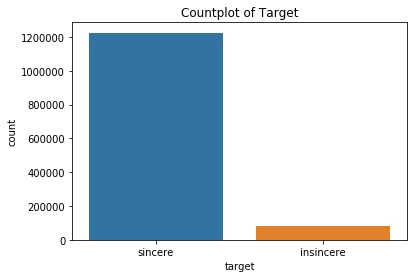

In [9]:
sns.countplot(data.target)
plt.title('Countplot of Target', fontsize=12)
plt.xticks((0,1),['sincere','insincere'])

* **The above countplot shows that the dataset is pretty skewed. There are many sincere questions as compared to insincere questions. There are about 1200000 questions classified as sincere whereas less than 10000 are clasified as insincere. This makes the classification problem a bit more complicated as the features defining insincere questions would be hard to spot when the data is so skewed.**

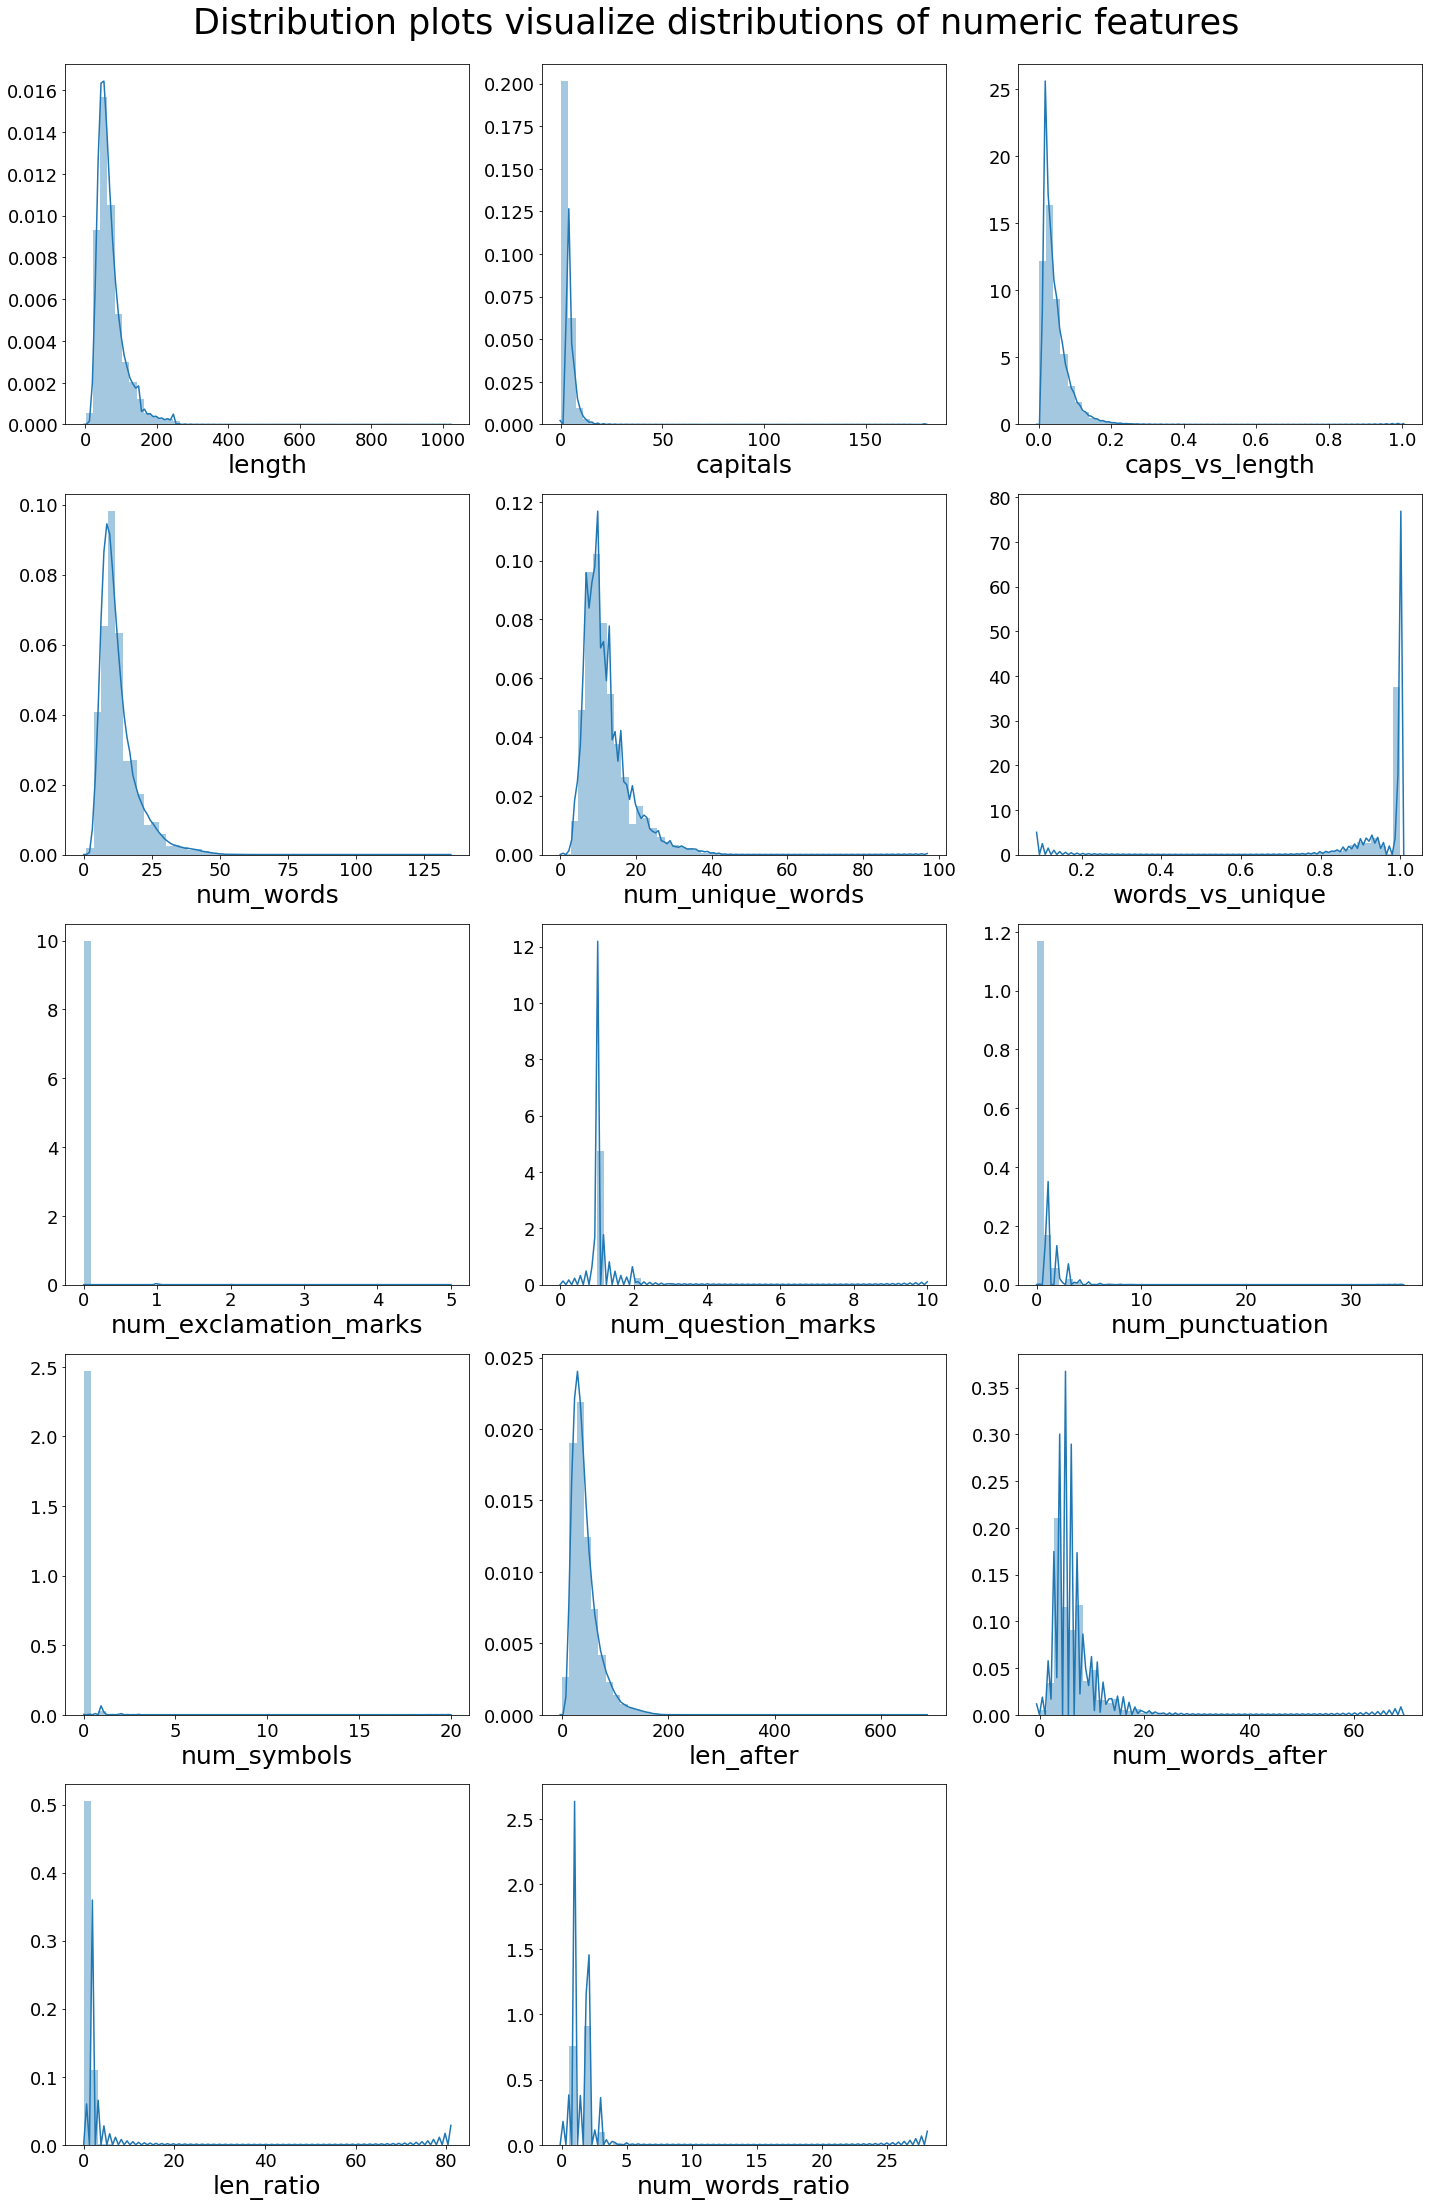

In [10]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),
      (ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3, figsize=(20,30))

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
columns=['length','capitals','caps_vs_length','num_words','num_unique_words','words_vs_unique',
         'num_exclamation_marks','num_question_marks','num_punctuation','num_symbols','len_after',
         'num_words_after','len_ratio','num_words_ratio']

st = fig.suptitle("Distribution plots visualize distributions of numeric features", fontsize=35)

for i in range(14):
    _=sns.distplot(data[columns[i]], ax=axes[i])
    _.set_xlabel(columns[i],fontsize=25)
    _.tick_params(labelsize = 18)

ax15.set_visible(False)
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

Text(0.5,1,'Correlation Heatmap for Numeric Variables')

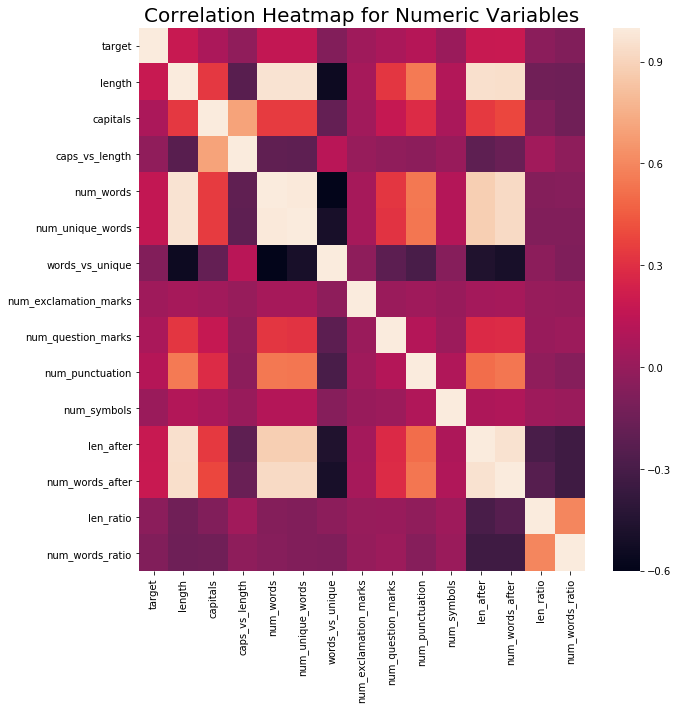

In [11]:
ax=plt.figure(figsize=(10,10))
correlation_df = data.drop('processed_text',1)
corr =correlation_df.corr()
ax=sns.heatmap(corr)
plt.title('Correlation Heatmap for Numeric Variables', fontsize=20)

* **Based on the correlation heatmap, we can conclude that there is strong positive correlation between length related and number of words features. This makes sense intutively, because longer the question, more words would be expected.**

In [12]:
# Separating the data into two dataframes belonging to different target categories.

insincere_df = data[data.target==1]
sincere_df = data[data.target==0]

In [13]:
def plot_wordcloud(text, title = None):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(background_color='white', stopwords = stopwords, max_words = 200, max_font_size = 100, 
                    width=1000, height=500)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=(10,20))
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': 40, 'color': 'black','verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

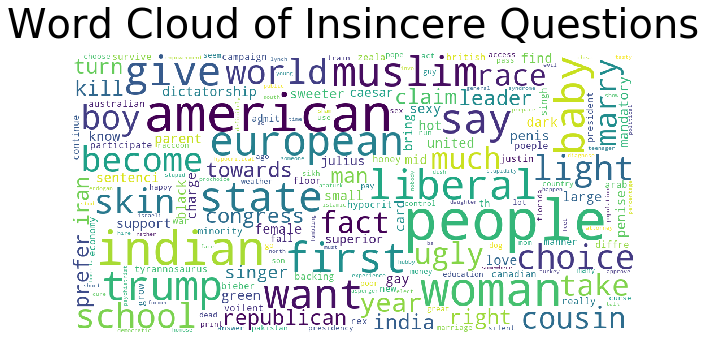

In [14]:
plot_wordcloud(insincere_df["processed_text"], title="Word Cloud of Insincere Questions")

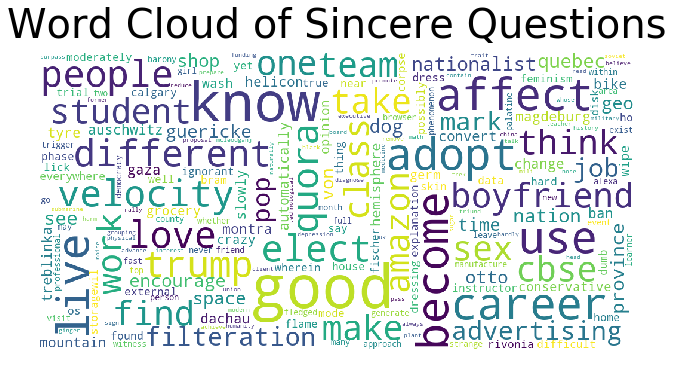

In [15]:
plot_wordcloud(sincere_df["processed_text"], title="Word Cloud of Sincere Questions")

**These word clouds give great insight into the most commonly found words in insincere vs sincere questions.** 
> **The common words in sincere questions are mostly positive / neutral words:**
> * good
> * affect
> * career
> * love
> * beceome

> **The common words in insincere questions are mostly negative / racial or provocative words:**
> * American
> * European
> * Muslim
> * people
> * woman

<br><br>
**Next, we can look at phrases (2,3 and 5 words long) and find out which are the top 20 occuring phrases in both sincere and insincere questions.**

In [16]:
def generate_ngrams(text, n_gram):
    token = [token for token in text.lower().split(" ") if (token != "" and token not in STOPWORDS)]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [17]:
def create_top20(dataframe, n):
    frequencies = defaultdict(int)
    for each in dataframe['processed_text']:
        for word in generate_ngrams(each, n):
            frequencies[word] += 1
    freq_sorted = pd.DataFrame(sorted(frequencies.items(), key=lambda x: x[1])[::-1])
    freq_sorted.columns = ["word", "frequency"]
    freq_sorted = freq_sorted.set_index('word')
    return freq_sorted.head(20)

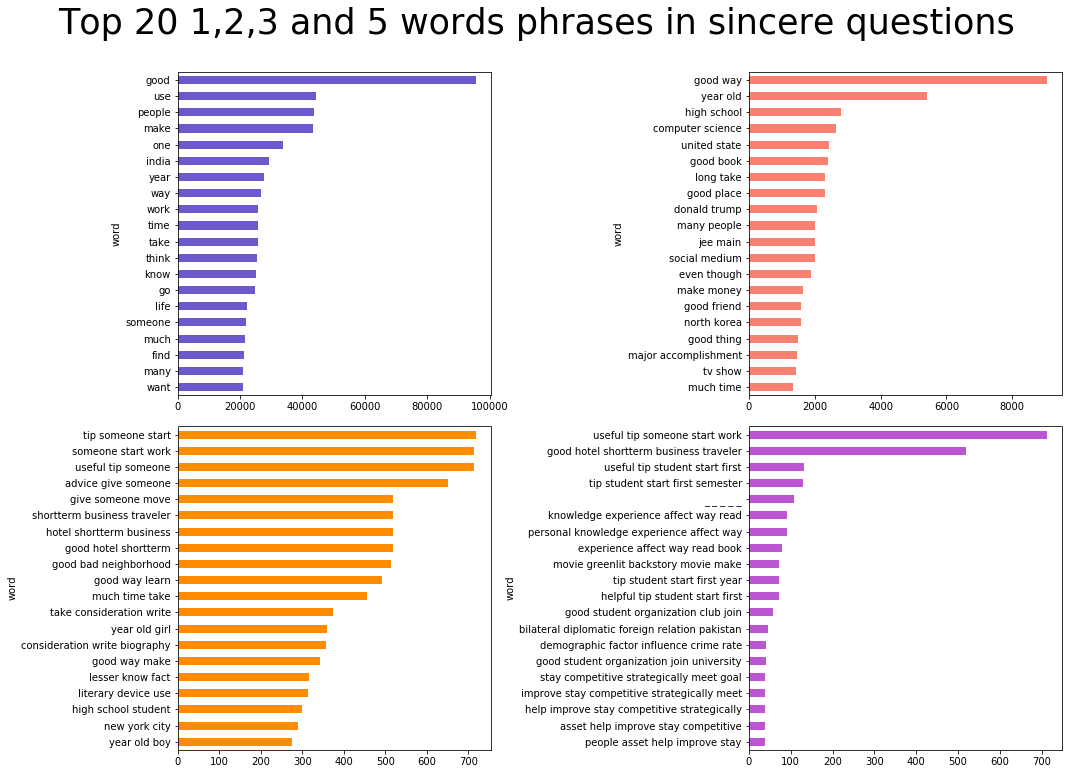

In [18]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
st = fig.suptitle("Top 20 1,2,3 and 5 words phrases in sincere questions", fontsize=35)

sincere_1 = create_top20(sincere_df,1)
sincere_1.plot(kind='barh', ax=ax1, color='slateblue')
ax1.invert_yaxis()
ax1.legend().set_visible(False)
sincere_2 = create_top20(sincere_df,2)
sincere_2.plot(kind='barh', ax=ax2, color='salmon')
ax2.invert_yaxis()
ax2.legend().set_visible(False)
sincere_3 = create_top20(sincere_df,3)
sincere_3.plot(kind='barh', ax=ax3, color='darkorange')
ax3.invert_yaxis()
ax3.legend().set_visible(False)
sincere_5 = create_top20(sincere_df,5)
sincere_5.plot(kind='barh', ax=ax4, color='mediumorchid')
ax4.invert_yaxis()
ax4.legend().set_visible(False)

st.set_y(1.07)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

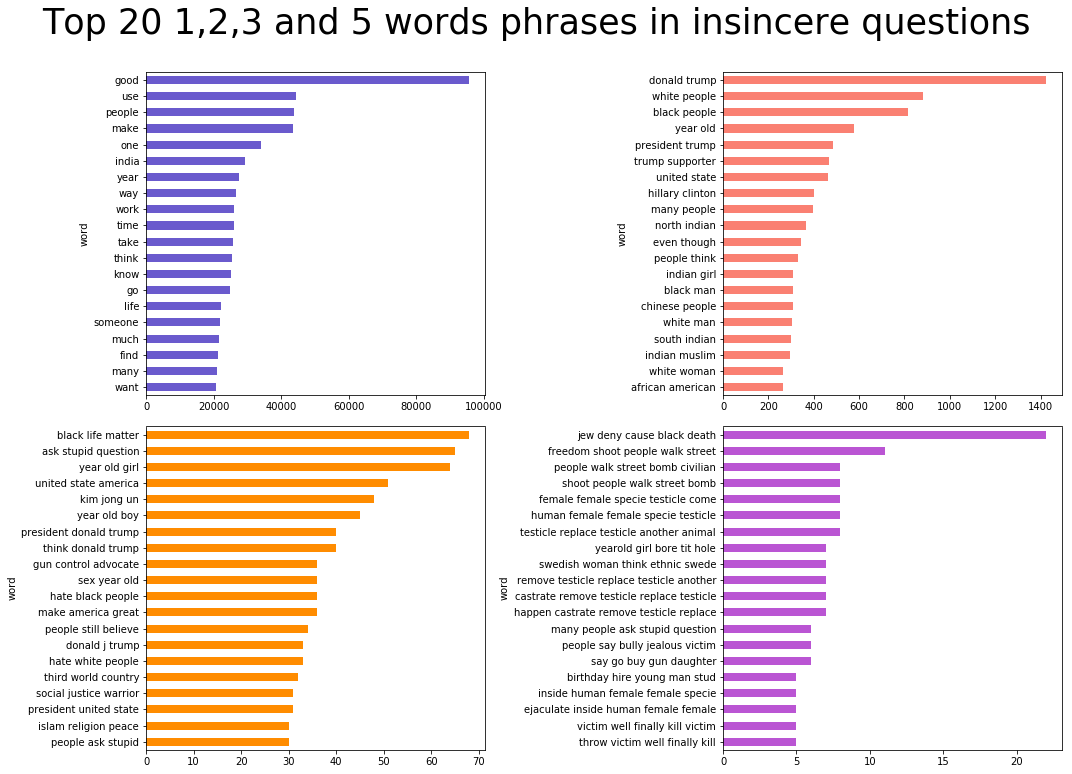

In [19]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
st = fig.suptitle("Top 20 1,2,3 and 5 words phrases in insincere questions", fontsize=35)

insincere_1 = create_top20(insincere_df,1)
sincere_1.plot(kind='barh', ax=ax1, color='slateblue')
ax1.invert_yaxis()
ax1.legend().set_visible(False)
insincere_2 = create_top20(insincere_df,2)
insincere_2.plot(kind='barh', ax=ax2, color='salmon')
ax2.invert_yaxis()
ax2.legend().set_visible(False)
insincere_3 = create_top20(insincere_df,3)
insincere_3.plot(kind='barh', ax=ax3, color='darkorange')
ax3.invert_yaxis()
ax3.legend().set_visible(False)
insincere_5 = create_top20(insincere_df,5)
insincere_5.plot(kind='barh', ax=ax4, color='mediumorchid')
ax4.invert_yaxis()
ax4.legend().set_visible(False)

st.set_y(1.07)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

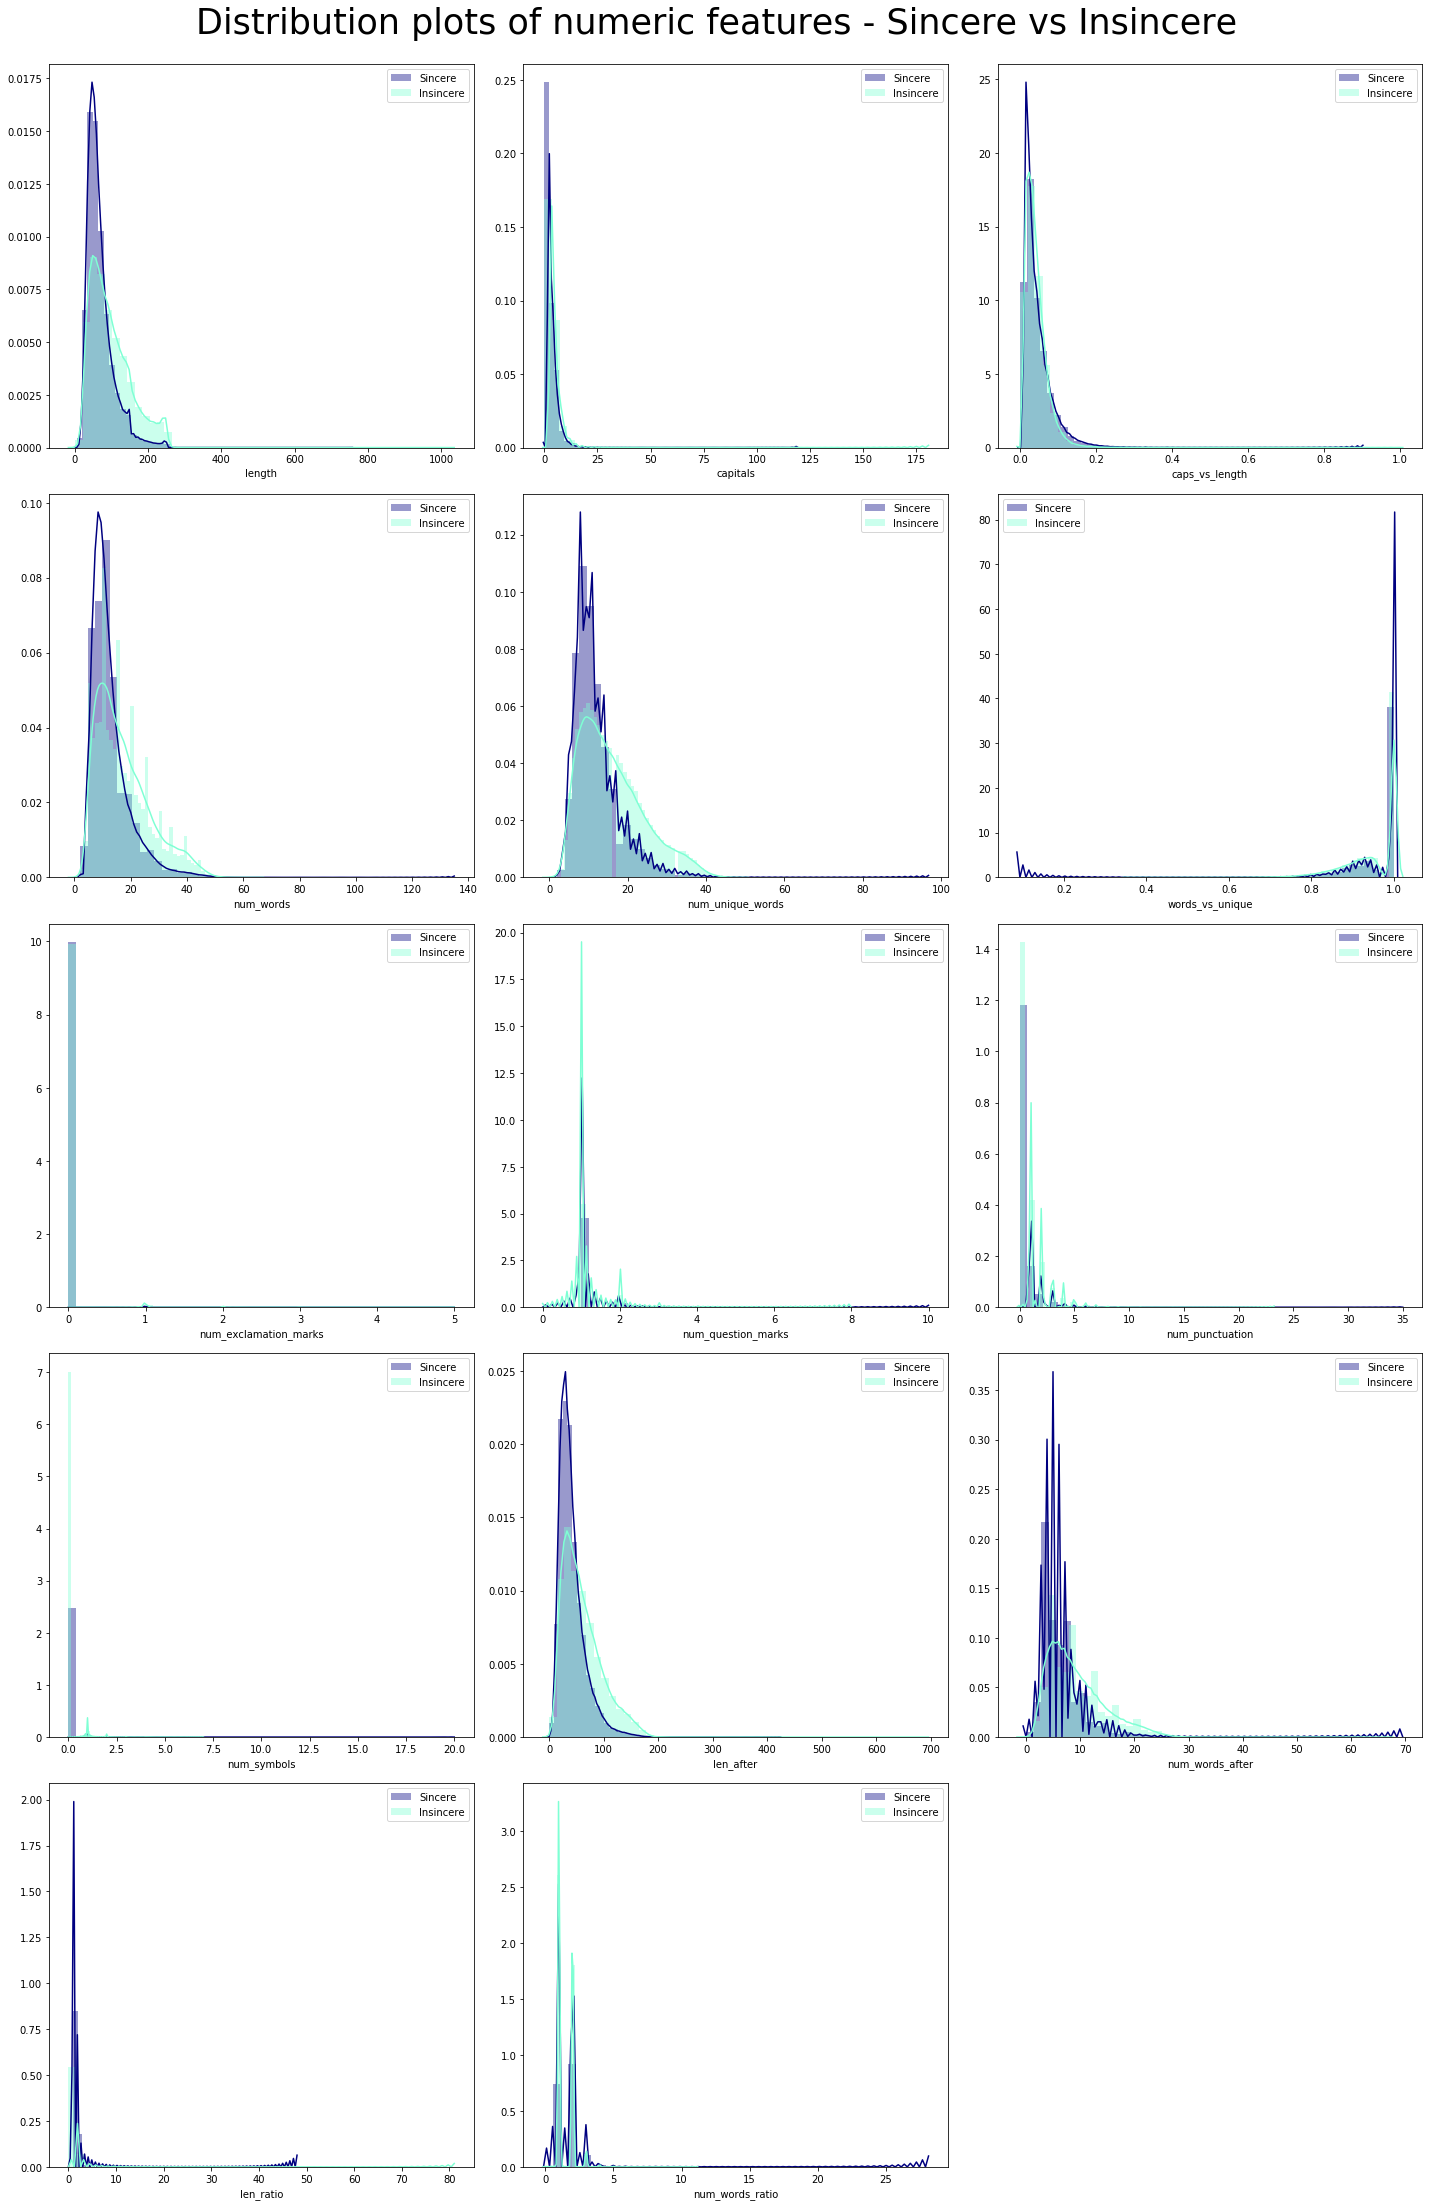

In [20]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),
      (ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
columns=['length','capitals','caps_vs_length','num_words','num_unique_words','words_vs_unique',
         'num_exclamation_marks','num_question_marks','num_punctuation','num_symbols','len_after',
         'num_words_after','len_ratio','num_words_ratio']

st = fig.suptitle("Distribution plots of numeric features - Sincere vs Insincere", fontsize=35)

for i in range(14):
    sns.distplot(sincere_df[columns[i]], ax=axes[i], color='navy', label='Sincere')
    sns.distplot(insincere_df[columns[i]], ax=axes[i],color='aquamarine', label='Insincere')
    axes[i].legend()
    
ax15.set_visible(False)
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

******
*******

# Inferential Statistics

### Having visualized the distribution of different numeric variables, looked at correlations between different features and also compared distribution of features in insincere and sincere questions, next we can run some statistical tests. These will help us strengthen our understanding of the data and make the results statistically significant.
****

##### We want to check if the numbr of words significantly differ in sincere and insincere questions.

* H0 (Null Hypothesis) --> Mean number of words in sincere questions = Mean number of words in insincere questions
* H1 (Alternate Hypothesis) --> Mean number of words in sincere questions != Mean number of words in insincere questions

In [21]:
sincere_words = sincere_df.num_words.values
insincere_words = insincere_df.num_words.values
all_words = data.num_words.values

print('Mean number of words in sincere questions : ', np.mean(sincere_words))
print('Mean number of words in insincere questions : ', np.mean(insincere_words))
print('Mean number of words in all questions : ', np.mean(all_words))

Mean number of words in sincere questions :  12.50853333681544
Mean number of words in insincere questions :  17.277812151961392
Mean number of words in all questions :  12.803609463740754


In [22]:
t, p_val = ttest_ind(sincere_words, insincere_words)

alpha=0.05
print('Null Hypothesis : Mean number of words in sincere questions = Mean number of words in insincere questions \np-value = ', p_val)
if p_val < alpha:  
    print("Verdict: The null hypothesis can be rejected.")
else:
    print("Verdict: The null hypothesis cannot be rejected.")

Null Hypothesis : Mean number of words in sincere questions = Mean number of words in insincere questions 
p-value =  0.0
Verdict: The null hypothesis can be rejected.


##### We want to check if the number to punctuations differ significantly in sincere and insincere questions.

* H0 (Null Hypothesis) --> Mean number of punctuations in sincere questions = Mean number of punctuations in insincere questions
* H1 (Alternate Hypothesis) --> Mean number of punctuations in sincere questions != Mean number of punctuations in insincere questions

In [23]:
col_list =['num_exclamation_marks','num_question_marks','num_punctuation']

In [24]:
sincere_punc = sincere_df[col_list].sum(axis=1)
insincere_punc = insincere_df[col_list].sum(axis=1)
all_punc = data[col_list].sum(axis=1)

print('Mean number of punctuations and symbols in sincere questions : ', np.mean(sincere_punc))
print('Mean number of punctuations and symbols in insincere questions : ', np.mean(insincere_punc))
print('Mean number of punctuations and symbols in all questions : ', np.mean(all_punc))

Mean number of punctuations and symbols in sincere questions :  1.3222109960565145
Mean number of punctuations and symbols in insincere questions :  1.7652765746813512
Mean number of punctuations and symbols in all questions :  1.3496235420580927


In [25]:
t, p_val = ttest_ind(sincere_punc, insincere_punc)

alpha=0.05
print('Null Hypothesis : Mean number of punctuations in sincere questions = Mean number of punctuations in insincere questions \np-value = ', p_val)
if p_val < alpha:  
    print("Verdict: The null hypothesis can be rejected.")
else:
    print("Verdict: The null hypothesis cannot be rejected.")

Null Hypothesis : Mean number of punctuations in sincere questions = Mean number of punctuations in insincere questions 
p-value =  0.0
Verdict: The null hypothesis can be rejected.


**From the statistical tests - 2 sample t tests, we can draw the following inferences:**
> * The number of words in sincere and insincere questions differe significantly, insincere questions seem to have more number of words than the sincere questions on average.
> * The number of punctuations in sincere and insincere questions differ significantly. Insincere questions seem to have more number of punctuations as compared to sincere questions.

**These inferences from the data will be very useful moving forward, as we try and fit classification models on our dataset to solve the problem of classifying a problem as sincere vs insincere and detecting toxic content in a question.**